# 2022-11-16

$$f(x) = mx + b$$

$$ \text{MSE} = \frac{1}{n} \sum^{n}_{i=0}(y_{i} - (mx_{i} + b))^2$$ 

$$\frac{\partial \text{MSE}}{\partial m} = \frac{1}{n} \sum^{n}_{i=0} 2 (y_{i} - (mx_{i} + b)) * (-x_{i}) = - \frac{2}{n} \sum^{n}_{i=0} x_{i}(y_{i} - (mx_{i} + b))$$

$$\frac{\partial \text{MSE}}{\partial b} = - \frac{2}{n} \sum^{n}_{i=0}(y_{i} - (mx_{i} + b))$$

$$m =m - L \frac{\partial \text{MSE}}{\partial m}$$
$$b = b - L \frac{\partial \text{MSE}}{\partial b}$$

In [1]:
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable
import numpy as np
import random

In [ ]:
def predict(year, rooms, has_garage, has_pool) -> float:
    return year * w_year + rooms * w_rooms + has_garage * weight_has_grage + has_pool * w_has_pool + b

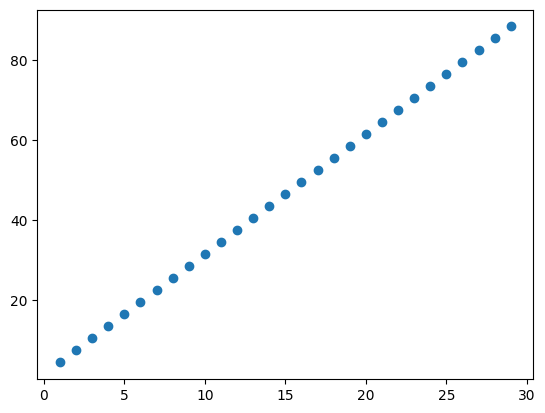

In [2]:
m = 3.
b = 1.5

def f(x: float, m: float, b: float) -> float:
    return x * m + b

def f_noisy(x: float, m: float, b: float, k: float = 1) -> float:
    return x * m + b + k * random.uniform(-1, 1)

x = np.arange(1, 30)
y = np.array([f(xi, m, b) for xi in x])

plt.scatter(x, y)

In [3]:
def mse(y: np.ndarray, y_f: np.ndarray) -> float:
    return 1 / y.size * np.sum((y - y_f)**2)

def optim(x: np.ndarray, y: np.ndarray, lr: float = 1e-3, epochs: int = 1000) -> Tuple[float, float]:
    m = random.uniform(-1, 1)
    b = random.uniform(-1, 1)
    for i in range(0, epochs):
        y_f = np.array([f(xi, m, b) for xi in x])
        d_m = - 2 / x.size * np.sum(x * (y-y_f))
        d_b = -2 / x.size * np.sum(y - y_f)

        m -= lr * d_m
        b -= lr * d_b

        if i % 100 == 0:
            print(f"Epoch {i} MSE: {mse(y, np.array([f(xi, m, b) for xi in x]))}")
        
    return m, b


Epoch 0 MSE: 568.8644880437691
Epoch 100 MSE: 1.1335687284749563
Epoch 200 MSE: 1.0311535413878998
Epoch 300 MSE: 0.9379913182214239
Epoch 400 MSE: 0.8532460761125265
Epoch 500 MSE: 0.7761573612236387
Epoch 600 MSE: 0.7060334248782393
Epoch 700 MSE: 0.6422450162160616
Epoch 800 MSE: 0.584219735666917
Epoch 900 MSE: 0.5314368985743858
Epoch 1000 MSE: 0.4834228628787421
Epoch 1100 MSE: 0.43974677893234254
Epoch 1200 MSE: 0.400016723308914
Epoch 1300 MSE: 0.36387618191382004
Epoch 1400 MSE: 0.3310008508367489
Epoch 1500 MSE: 0.30109572623964637
Epoch 1600 MSE: 0.2738924571662026
Epoch 1700 MSE: 0.24914693751857694
Epoch 1800 MSE: 0.22663711559321312
Epoch 1900 MSE: 0.20616100151976216
Epoch 2000 MSE: 0.18753485472307982
Epoch 2100 MSE: 0.17059153514364306
Epoch 2200 MSE: 0.15517900342118496
Epoch 2300 MSE: 0.1411589565831383
Epoch 2400 MSE: 0.12840558699528426
Epoch 2500 MSE: 0.116804453438223
Epoch 2600 MSE: 0.10625145417934954
Epoch 2700 MSE: 0.09665189282528004
Epoch 2800 MSE: 0.087919

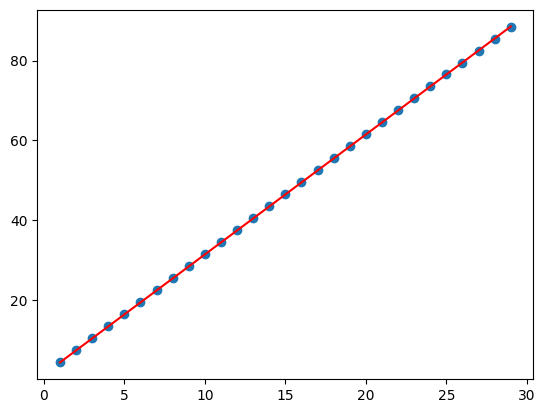

In [4]:
new_b, new_m = optim(x, y, epochs=10000)
y_f = np.array([f(xi, new_b, new_m) for xi in x])
print(new_b, new_m)
plt.scatter(x, y)
plt.plot(x, y_f, 'r')

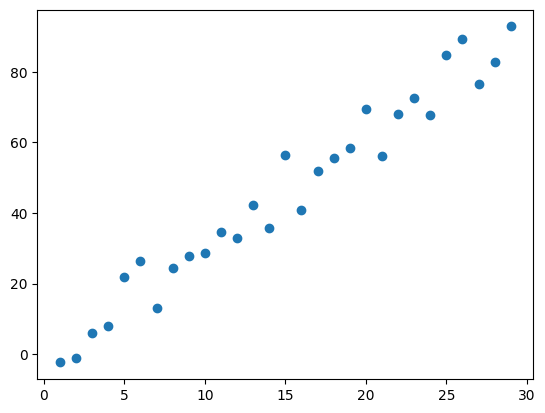

In [5]:
x = np.arange(1, 30)
y = np.array([f_noisy(xi, m, b, 10) for xi in x])

plt.scatter(x, y)

Epoch 0 MSE: 495.03374255859626
Epoch 100 MSE: 28.729614106859575
Epoch 200 MSE: 28.678934210072804
Epoch 300 MSE: 28.632833119123386
Epoch 400 MSE: 28.590897150001954
Epoch 500 MSE: 28.552749994046735
Epoch 600 MSE: 28.518049341171444
Epoch 700 MSE: 28.48648380817638
Epoch 800 MSE: 28.457770144579282
Epoch 900 MSE: 28.431650690892315
Epoch 1000 MSE: 28.407891066537942
Epoch 1100 MSE: 28.386278066655684
Epoch 1200 MSE: 28.366617748927464
Epoch 1300 MSE: 28.348733693253532
Epoch 1400 MSE: 28.33246541866258
Epoch 1500 MSE: 28.317666943250053
Epoch 1600 MSE: 28.304205474222684
Epoch 1700 MSE: 28.291960216294193
Epoch 1800 MSE: 28.280821287739624
Epoch 1900 MSE: 28.270688734381554
Epoch 2000 MSE: 28.26147163266022
Epoch 2100 MSE: 28.25308727373909
Epoch 2200 MSE: 28.2454604213246
Epoch 2300 MSE: 28.238522636539866
Epoch 2400 MSE: 28.232211663794725
Epoch 2500 MSE: 28.22647087214063
Epoch 2600 MSE: 28.221248747098016
Epoch 2700 MSE: 28.216498428395685
Epoch 2800 MSE: 28.212177289474344
Epoc

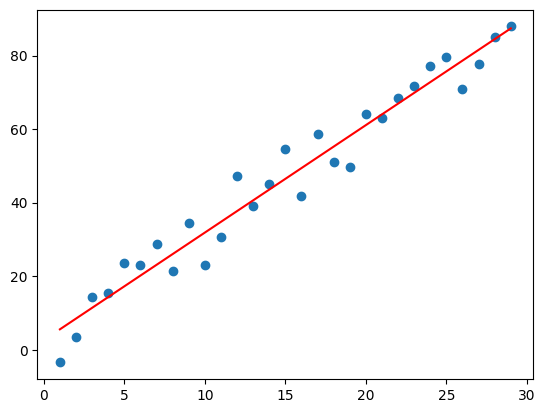

: 

: 

: 

: 

: 

In [ ]:
new_b, new_m = optim(x, y, epochs=10000)
y_f = np.array([f(xi, new_b, new_m) for xi in x])
print(new_b, new_m)
plt.scatter(x, y)
plt.plot(x, y_f, 'r')

$$f(x_{j_{1}}, \dotsc , x_{j_{k}}) = w_{j_{1}}x_{j_{1}} + \dotsc + w_{j_{k}}x_{j_{k}} + b$$

$$ \text{MSE} = \frac{1}{n} \sum^{n}_{i=0}(y_{i} - (w_{j_{1}}x_{j_{1}i} + \dotsc + w_{j_{k}}x_{j_{k}i} + b))^2$$ 

$$\frac{\partial \text{MSE}}{\partial w_{j}} = - \frac{2}{n} \sum^{n}_{i=0} x_{j}(y_{i} - (w_{j_{1}}x_{i} +  \dotsc + w_{j_{k}}x_{j_{k}i} + b))$$

$$\frac{\partial \text{MSE}}{\partial b} = - \frac{2}{n} \sum^{n}_{i=0}(y_{i} - (w_{j_{1}}x_{i}  + \dotsc + w_{j_{k}}x_{j_{k}i} + b)$$

$$w_{j_{1}, \dotsc , j_{k}} = w_{j_{1}, \dotsc , j_{k}} - L \frac{\partial \text{MSE}}{\partial w_{j_{1}}, \dotsc , w_{j_{k}}}$$
$$b = b - L \frac{\partial \text{MSE}}{\partial b}$$

In [6]:
w = np.array([1., 1.5])
b = 1.5

def f(x: np.array, weights: np.array, bias: float) -> np.array:
    return np.dot(x, weights) + bias

def f_noise(x: np.array, weights: np.array, bias: float, k: float = 1) -> np.array:
    res = np.dot(x, weights) + bias 
    for i in res[0]:
        i *= k * random.uniform(-1, 1)

In [141]:
class LinearRegressionBetter:
    def __init__(self) -> None:
        self._weights: np.ndarray = None
        self._bias: float = None

    def fit(self, x: np.ndarray, y: np.ndarray, lr: float = 1e-3, epochs: int = 100) -> None:
        self._weights = np.zeros(x.shape[1])
        self._bias = random.uniform(-1, 1)

        for i in range(0, epochs):
            y_f = x.dot(self._weights) + self._bias

            d_w = -2 / x.size * np.dot(x.T, (y - y_f))
            d_b = -2 /  x.size * np.sum(y - y_f)

            self._weights -= lr * d_w
            self._bias -= lr * d_b

    def predict(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self._weights) + self._bias

In [132]:
x = np.array([[100, 10], [90, 2], [95, 6]])
weights = np.array([1, 3])

In [134]:
x * weights

array([[100,  30],
       [ 90,   6],
       [ 95,  18]])

In [138]:
x.T

array([[100,  90,  95],
       [ 10,   2,   6]])

In [140]:
y = [129, 82, 113]
y_pred = x.dot(weights)

np.dot(x.T, (y - y_pred))

array([-1360,   -38])

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [148]:
df = pd.read_csv("./data/Car details v3.csv")

df.head()

x = df[["year", "km_driven"]].values
y = df["selling_price"].values

In [149]:
df["year"].max()

2020

In [150]:
df["year"].min()

1983

In [151]:
normalizer = MinMaxScaler()
std = StandardScaler()
#x = normalizer.fit_transform(x)
x = std.fit_transform(x)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [154]:
lrb = LinearRegressionBetter()
lrb.fit(x_train, y_train, epochs=1000)
lrb._weights

array([191487.70318884, -75316.07694221])

In [83]:
lr = LinearRegression()
lrb = LinearRegressionBetter()

In [78]:
lrb.fit(x_train, y_train, epochs=1000)

/var/folders/3t/wmv3mchd6w99pw9syrlwn5kh0000gq/T/ipykernel_3750/3726032946.py:13: RuntimeWarning: overflow encountered in multiply
  d_w = x.size * np.dot(x.T, (y_f - y))
/var/folders/3t/wmv3mchd6w99pw9syrlwn5kh0000gq/T/ipykernel_3750/3726032946.py:14: RuntimeWarning: overflow encountered in double_scalars
  d_b = x.size * np.sum(y_f - y)
/var/folders/3t/wmv3mchd6w99pw9syrlwn5kh0000gq/T/ipykernel_3750/3726032946.py:11: RuntimeWarning: invalid value encountered in add
  y_f = x.dot(self._weights) + self._bias


In [122]:
lr.fit(x_train, y_train)

LinearRegression()

In [121]:
lrb._weights

array([nan, nan])

In [155]:
print(mean_absolute_error(y_test, lrb.predict(x_test)))

333407.3936284919


In [125]:
lr.predict([x_test[0]])

array([693115.36972527])

In [126]:
lr.coef_

array([309860.67218353, -41778.83921086])

In [127]:
x_test[0]

array([0.29574411, 0.71056705])

In [80]:
print(mean_absolute_error(y_test, lrb.predict(x_test)))

ValueError: Input contains NaN.